## Random Forest - Credit Default Prediction

### Data Understanding and Cleaning

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [4]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

### Data Preparation and Model Building

In [6]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [7]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [8]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc =RandomForestClassifier()

In [9]:
# Fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
# Making predictions
pred=rfc.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [12]:
# Let's check the report of our default model
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7058
           1       0.65      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [13]:
# Printing confusion matrix
print(confusion_matrix(y_test,pred))

[[6677  381]
 [1241  701]]


In [14]:
print(accuracy_score(y_test,pred))

0.8197777777777778


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [15]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold,GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters={"max_depth":range(2,20,5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf =GridSearchCV(rf,parameters, cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [16]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.781566,0.129271,0.084371,0.007657,2,{'max_depth': 2},0.804048,0.800952,0.800000,0.793810,...,0.799238,0.003452,4,0.799940,0.796310,0.797143,0.799881,0.799286,0.798512,0.001499
1,4.075664,0.076535,0.084374,0.007654,7,{'max_depth': 7},0.816429,0.822381,0.816190,0.813571,...,0.817000,0.002899,1,0.830357,0.832381,0.832917,0.832917,0.828929,0.831500,0.001594
2,6.775137,0.985491,0.143747,0.025000,12,{'max_depth': 12},0.815714,0.818571,0.820952,0.810238,...,0.816381,0.003574,2,0.883512,0.883988,0.883512,0.887738,0.885595,0.884869,0.001626
3,7.047399,0.085386,0.156246,0.019763,17,{'max_depth': 17},0.814048,0.816429,0.821190,0.809524,...,0.815571,0.003805,3,0.928155,0.928929,0.931667,0.932560,0.929345,0.930131,0.001687


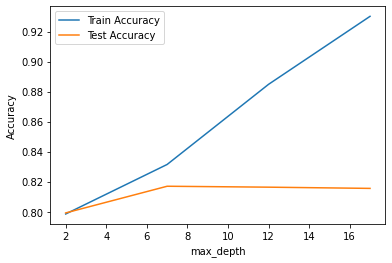

In [17]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
        scores["mean_train_score"],
        label="Train Accuracy")
plt.plot(scores["param_max_depth"],
        scores["mean_test_score"],
        label="Test Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

### Tuning n_estimators i.e no. of trees in the random forest

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [18]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"n_estimators":range(100,1500,400)}

# instantiate the model (note we are specifying a max_depth)

#rf = RandomForestClassifier(max_depth=7)
#(but it staking lot of tym so i change it to 7 to 4)

rf = RandomForestClassifier(max_depth=4)

# fit tree on training data
rf =GridSearchCV(rf,parameters,cv=n_folds, scoring="accuracy",return_train_score=True)
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [19]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.430835,0.078253,0.068746,0.007653,100,{'n_estimators': 100},0.811429,0.812381,0.811190,0.805000,...,0.809000,0.003290,4,0.809583,0.810357,0.811905,0.813631,0.810714,0.811238,0.001411
1,12.092270,0.296246,0.351317,0.041489,500,{'n_estimators': 500},0.810714,0.813333,0.811667,0.805476,...,0.809857,0.002771,1,0.811071,0.810119,0.811905,0.812976,0.812679,0.811750,0.001050
2,23.423404,1.435294,0.698154,0.087923,900,{'n_estimators': 900},0.810952,0.813333,0.811429,0.805000,...,0.809667,0.002972,3,0.810952,0.810000,0.812262,0.812560,0.813214,0.811798,0.001162
3,33.896354,0.821176,0.995705,0.122244,1300,{'n_estimators': 1300},0.810952,0.814286,0.811190,0.805476,...,0.809810,0.003135,2,0.811131,0.810357,0.811310,0.812679,0.812381,0.811571,0.000851


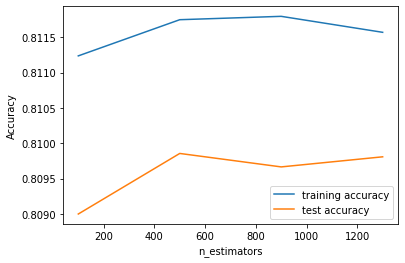

In [20]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [21]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [22]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.535886,0.026605,0.075974,0.001898,4,{'max_features': 4},0.811905,0.813095,0.811905,0.804524,...,0.809952,0.003149,5,0.810417,0.809524,0.812202,0.812262,0.812798,0.811440,0.001251
1,4.365005,0.127626,0.075314,0.000751,8,{'max_features': 8},0.817381,0.821667,0.820476,0.817143,...,0.819000,0.001778,2,0.821190,0.820655,0.822143,0.822440,0.821905,0.821667,0.000653
2,7.065139,0.300706,0.070936,0.005993,14,{'max_features': 14},0.817381,0.820952,0.820238,0.816905,...,0.818619,0.001645,4,0.822321,0.821012,0.821548,0.822738,0.822083,0.821940,0.000603
3,9.365166,0.377540,0.068553,0.002109,20,{'max_features': 20},0.818333,0.819762,0.820714,0.817381,...,0.818714,0.001327,3,0.822917,0.821488,0.821548,0.822738,0.821786,0.822095,0.000609
4,12.705353,1.167791,0.078019,0.015009,24,{'max_features': 24},0.817619,0.822619,0.819762,0.816667,...,0.819095,0.002050,1,0.823155,0.821190,0.821726,0.822202,0.822381,0.822131,0.000658


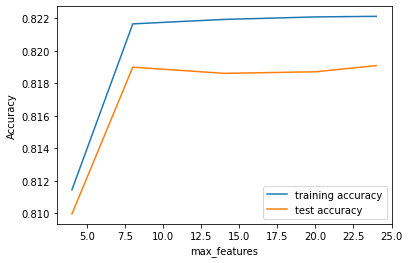

In [23]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Apparently, the training and test scores both seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.


In [24]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [25]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.894983,0.390991,0.112073,0.002676,100,{'min_samples_leaf': 100},0.812143,0.817857,0.813810,0.811905,...,0.812905,0.002956,1,0.817738,0.818274,0.813869,0.819643,0.815179,0.816940,0.002110
1,4.112665,0.235312,0.103625,0.013811,150,{'min_samples_leaf': 150},0.812619,0.809762,0.810714,0.805952,...,0.809429,0.002272,3,0.812976,0.808690,0.810119,0.811607,0.811905,0.811060,0.001496
2,3.973225,0.103789,0.106844,0.016226,200,{'min_samples_leaf': 200},0.810952,0.816667,0.810714,0.805238,...,0.810143,0.003914,2,0.809464,0.814821,0.811250,0.812440,0.810536,0.811702,0.001836
3,3.950095,0.491697,0.098187,0.020124,250,{'min_samples_leaf': 250},0.811905,0.813095,0.809762,0.805000,...,0.808714,0.003697,4,0.809226,0.809345,0.807262,0.810357,0.807679,0.808774,0.001142
4,3.593321,0.337176,0.090461,0.006382,300,{'min_samples_leaf': 300},0.809762,0.811429,0.808571,0.804762,...,0.808190,0.002365,5,0.808631,0.807857,0.809524,0.809583,0.808274,0.808774,0.000682


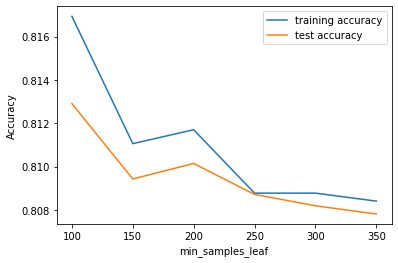

In [26]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf.

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [27]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [28]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.324971,0.108161,0.126235,0.004963,200,{'min_samples_split': 200},0.818810,0.822857,0.821667,0.817619,...,0.820143,0.001896,1,0.824286,0.823095,0.823690,0.824226,0.824821,0.824024,0.000586
1,7.245629,0.503022,0.168113,0.054480,250,{'min_samples_split': 250},0.818333,0.822381,0.821905,0.816429,...,0.819286,0.002414,2,0.823095,0.822202,0.822560,0.822679,0.822679,0.822643,0.000286
2,6.932515,0.694638,0.159334,0.046093,300,{'min_samples_split': 300},0.816905,0.821667,0.822143,0.815476,...,0.818762,0.002662,3,0.821548,0.821429,0.821786,0.821488,0.821726,0.821595,0.000138
3,5.686909,0.090687,0.115999,0.003698,350,{'min_samples_split': 350},0.818810,0.821190,0.821190,0.814048,...,0.818619,0.002636,4,0.821071,0.819821,0.821071,0.820238,0.820893,0.820619,0.000503
4,5.989883,0.640226,0.119006,0.009670,400,{'min_samples_split': 400},0.819048,0.819524,0.820476,0.814524,...,0.818143,0.002110,6,0.820893,0.819167,0.819464,0.820655,0.821310,0.820298,0.000834


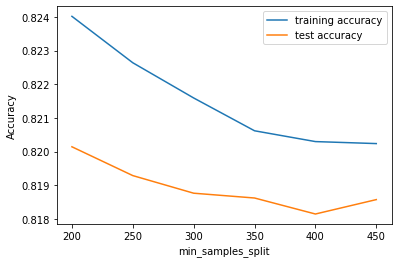

In [29]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [30]:
from sklearn.model_selection import KFold,GridSearchCV

In [31]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search =GridSearchCV(rf,param_grid=param_grid,cv=3,n_jobs = -1,verbose = 1,return_train_score=True)

In [32]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 13.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [33]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8184761904761905 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 300, 'min_samples_split': 400, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [34]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [35]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# predict
predictions = rfc.predict(X_test)

In [37]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.36      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [39]:
print(confusion_matrix(y_test,predictions))

[[6746  312]
 [1248  694]]


In [40]:
accuracy_score(y_test,predictions)

0.8266666666666667

# Bagging

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

##### Fitting the data

In [43]:
knn=KNeighborsClassifier()

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Testing the score

In [45]:
knn.score(X_train,y_train)

0.8111428571428572

In [46]:
knn.score(X_test,y_test)

0.746

### Find the best possible parametere

In [47]:
# param_grid={"algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#             "leaf_size":[10,12,34,56,67,23,45],
#             "n_neighbors":[3,5,7,8,9,10,12,13,17,20]
    
# }

# Since its taking 1400 fit going to reduce this

In [48]:
param_grid={"algorithm" : ['ball_tree', 'kd_tree', 'brute'],
            "leaf_size":[10,12,34,56],
            "n_neighbors":[3,5,7,8,9,10]
    
}

In [49]:
gridsearch=GridSearchCV(knn,param_grid=param_grid,verbose=3)
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, score=0.723, total=   3.3s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, score=0.728, total=   3.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, score=0.720, total=   3.2s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, score=0.720, total=   3.3s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, score=0.724, total=   3.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=5, score=0.750, total=   3.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=5, score=0.741, total=   3.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=5, score=0.743, total=   3.3s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=5, score=0.743, total= 

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 16.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 12, 34, 56],
                         'n_neighbors': [3, 5, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

### Findiing best parameters

In [50]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 10}

In [51]:
knn=KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 10, n_neighbors= 10)

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [53]:
knn.score(X_train,y_train)

0.7922380952380952

In [54]:
knn.score(X_test,y_test)

0.7777777777777778

## Creating a bag of KNN model

In [55]:
bag_knn=BaggingClassifier(KNeighborsClassifier(6))

In [56]:
bag_knn.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=6, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [57]:
bag_knn.score(X_train,y_train)

0.8097619047619048

In [58]:
bag_knn.score(X_test,y_test)

0.7573333333333333

# In order to increase the accuracy lets do some experiments


In [59]:
bag_knn=BaggingClassifier(KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 10, n_neighbors= 10),n_estimators=30)

In [60]:
bag_knn.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='ball_tree',
                                                      leaf_size=10,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=10, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=30, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [61]:
bag_knn.score(X_train,y_train)

0.795047619047619

In [62]:
bag_knn.score(X_test,y_test)

0.7687777777777778

## Bagging used as Random forest

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
bag_dtree=BaggingClassifier(DecisionTreeClassifier(),n_estimators=20)

In [69]:
bag_dtree.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [70]:
bag_dtree.score(X_train,y_train)

0.9934761904761905

In [71]:
bag_dtree.score(X_test,y_test)

0.8151111111111111

In [72]:
r_frst=RandomForestClassifier(n_estimators=20)

In [74]:
r_frst.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
r_frst.score(X_train,y_train)

0.993

In [76]:
r_frst.score(X_test,y_test)

0.8156666666666667

**Here we can see Random forest and bagging yield the same result**

In [77]:
r_frst.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=204719185, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=2118892377, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m

## Imp Interview question

**This is what `Bootstrapping` did internally, it achieve result by applying different different random state**

In [80]:
from sklearn import tree

### plotting only one tree using first random state

[Text(865.1364351829685, 1073.2615384615385, 'X[6] <= 1.5\ngini = 0.348\nsamples = 13211\nvalue = [16288, 4712]'),
 Text(763.9513797981768, 1045.3846153846155, 'X[5] <= 45.5\ngini = 0.279\nsamples = 11815\nvalue = [15624, 3146]'),
 Text(630.3568772854326, 1017.5076923076923, 'X[17] <= 61509.5\ngini = 0.271\nsamples = 9994\nvalue = [13318, 2564]'),
 Text(499.72117495252087, 989.6307692307693, 'X[20] <= 2865.0\ngini = 0.284\nsamples = 8019\nvalue = [10554, 2177]'),
 Text(382.8087124862674, 961.7538461538462, 'X[6] <= 0.5\ngini = 0.316\nsamples = 5816\nvalue = [7415, 1817]'),
 Text(281.30296946126293, 933.876923076923, 'X[8] <= 1.0\ngini = 0.278\nsamples = 4799\nvalue = [6340, 1271]'),
 Text(165.07611391168763, 906.0, 'X[12] <= 8365.5\ngini = 0.263\nsamples = 4476\nvalue = [6000, 1107]'),
 Text(56.4443105737398, 878.123076923077, 'X[1] <= 15000.0\ngini = 0.301\nsamples = 1890\nvalue = [2416, 546]'),
 Text(4.98482639025736, 850.2461538461539, 'X[16] <= 8035.5\ngini = 0.462\nsamples = 67\nv

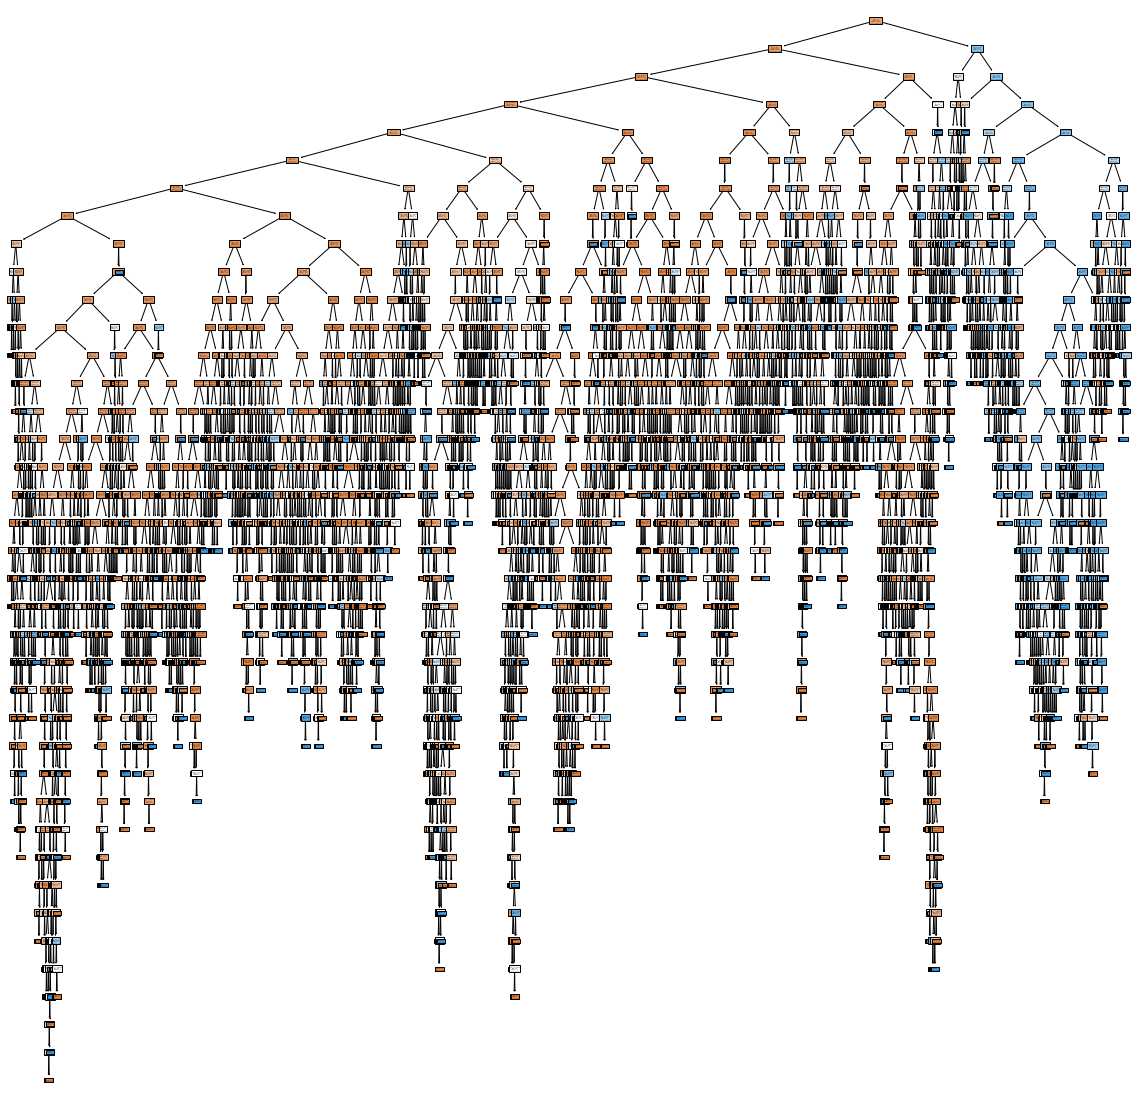

In [81]:
plt.figure(figsize=(20,20))
tree.plot_tree(r_frst.estimators_[0],filled=True)